Importing Numpy, Matplotlib and Scipy, also math

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import math

**Exercise 1**

Creation of A in R^n*n random matrix and x_true column vector of n ones

In [5]:
n=2
A = np.array([[1, 2], [3, 4]])
x_true = np.ones(n).reshape(-1,1)

*Computes the right-hand side of the linear system b = A*x_true*

In [6]:
b = np.dot(A, x_true)

*Computes the condition number in 2-norm of the matrix A.*

In [7]:
condition_number_2 = np.linalg.cond(A, 2)
print(condition_number_2)

14.933034373659268


*It is ill-conditioned?* **No, condition number is low**

*What if we use
the ∞-norm instead of the 2-norm?*

In [8]:
condition_number_inf = np.linalg.cond(A, np.inf)
print(condition_number_inf)

20.999999999999993


**Still low condition number, so it is not conditioned**

*Solves the linear system Ax = b with the function np.linalg.solve().*

In [9]:
x = np.linalg.solve(A, b)

*Computes the relative error between the solution computed before and the true solution xtrue*

In [10]:
rel_err = (np.linalg.norm(np.subtract(x, x_true), 2))/(np.linalg.norm(x_true, 2))
print(rel_err)

2.830524433501838e-16


*Plot a graph (using matplotlib.pyplot) with the relative errors as a function of n and (in a new
window) the condition number in 2-norm K2(A) and in ∞-norm, as a function of n*

In [11]:
def err_and_cond(n, vander = False, hilbert = False):
  # A = []
  # for i in range(0, n):
  #   A.append(np.arange((i*n)+1, n+(i*n)+1))
  #A= np.matrix(A)
  A = np.random.rand(n, n)
  if vander:
    A= np.vander(np.arange(1, n+1))
  if hilbert:
    A=scipy.linalg.hilbert(n)
  x_true = np.ones(n).reshape(-1,1)
  b = np.dot(A, x_true)
  condition_number_2 = np.linalg.cond(A, 2)
  condition_number_inf = np.linalg.cond(A, np.inf)
  x = np.linalg.solve(A, b)
  rel_err = (np.linalg.norm(np.subtract(x, x_true), 2))/(np.linalg.norm(x_true, 2))
  return rel_err, condition_number_2, condition_number_inf

Getting values

In [12]:
def get_values(start, end, step, vander= False, hilbert= False):
  indeces = np.arange(start, end, step)
  rel_errs, conds_2, conds_inf = [], [], []
  for n in indeces:
    rel_err, cond_2, cond_inf = err_and_cond(n, vander, hilbert)
    rel_errs.append(rel_err)
    conds_2.append(cond_2)
    conds_inf.append(cond_inf)
  return indeces, rel_errs, conds_2, conds_inf

In [13]:
indeces, rel_errs, conds_2, conds_inf = get_values(1, 15, 1)

Plotting

In [14]:
def my_plot(indeces, rel_errs, conds_2, conds_inf):
  fig1 = plt.figure()
  plt.plot(indeces, rel_errs)
  plt.show()
  fig2 = plt.figure()
  plt.plot(indeces, conds_2)
  plt.plot(indeces, conds_inf)
  plt.show()

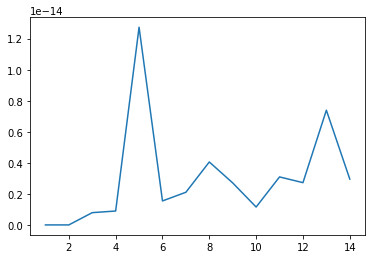

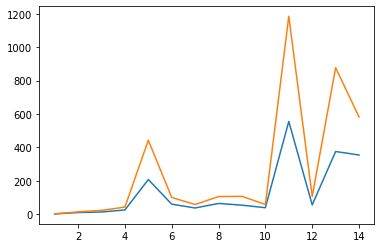

In [15]:
my_plot(indeces, rel_errs, conds_2, conds_inf)

**Exercise 2**

Random Matrix

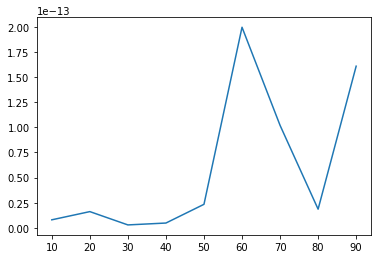

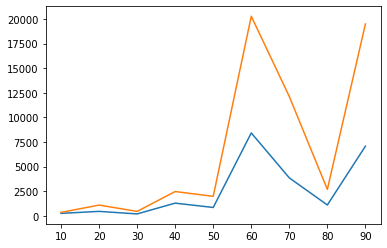

In [16]:
i, err, cond_2, cond_inf = get_values(10, 100, 10)
my_plot(i, err, cond_2, cond_inf)

Vandermonde Matrix

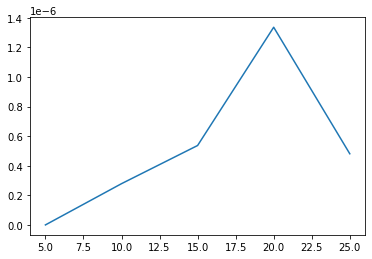

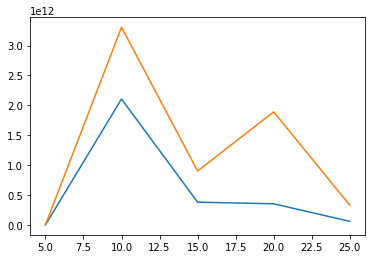

In [17]:
i, err, cond_2, cond_inf = get_values(5, 30, 5, vander=True)
my_plot(i, err, cond_2, cond_inf)

Hilbert Matrix

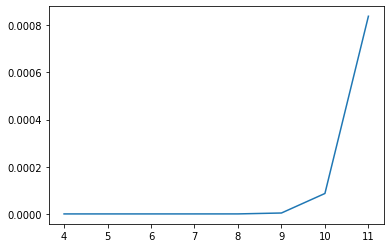

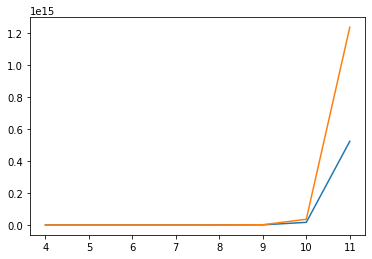

In [18]:
i, err, cond_2, cond_inf = get_values(4, 12, 1, hilbert=True)
my_plot(i, err, cond_2, cond_inf)

**Exercise 3**

*Compute machine_epsilon, which
is defined as the smallest floating point number such that it holds:
fl(1 + machine_epsilon) > 1*

In [19]:
machine_epsilon = 1
while float(1+machine_epsilon) > 1:
  machine_epsilon = machine_epsilon/2
print(machine_epsilon)

1.1102230246251565e-16


*Let’s consider the sequence an = (1 + 1
n
)
n. It is well known that:
limn→∞
an = e
where e is the Euler costant. Choose different values for n, compute an and compare it to the real
value of the Euler costant. What happens if you choose a large value of n? Guess the reason*

In [20]:
def a_n(n):
  return (1+(1/n))**n

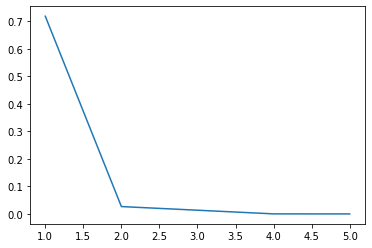

In [21]:
ns = [1, 50, 100, 10000, 999999999]
ecs = []
for n in ns:
  ecs.append(a_n(n))
abs_errs = []
for ec in ecs:
  abs_errs.append(math.e - ec)
plt.figure()
plt.plot(np.arange(1,len(ns)+1), abs_errs)
plt.show()

*Let’s consider the matrices:
A =

4 2
1 3
, B =

4 2
2 1
Compute the rank of A and B and their eigenvalues. Are A and B full-rank matrices? Can you infer
some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate
your deduction with other examples.*

In [24]:
A = np.matrix([[4, 2], [1, 3]])
B = np.matrix([[4, 2], [2 ,1]])
A_rank = np.linalg.matrix_rank(A)
B_rank = np.linalg.matrix_rank(B)
A_eig = np.linalg.eig(A)
B_eig = np.linalg.eig(B) 
print(A_rank, B_rank)
print(A_eig[0])
print(B_eig[0])

2 1
[5. 2.]
[5. 0.]


A is a full rank matrix, while B is not (is rank 1). If there is eigval 0, the det = 0, so the matrix is not full ranked.

Example

In [35]:
#Full rank and not a eigval = 0
C = np.matrix([[1, 2, 3], [6, 12, 9], [9, 2, 1]])
print(np.linalg.matrix_rank(C))
print(np.linalg.eig(C)[0])

#Not full rank and not a eigval = 0
D = np.matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(np.linalg.matrix_rank(D))
print(np.linalg.eig(D)[0])

#Not full rank because a eigval = 0
E = np.matrix([[1, 0, 3], [2, 0, 4], [5, 0, 9]])
print(np.linalg.matrix_rank(E))
print(np.linalg.eig(E)[0])

3
[15.46698572 -3.8716714   2.40468568]
2
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
2
[ 0.         -0.56776436 10.56776436]
